In [1]:
# 导入工具包
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# 设置颜色和风格
color=sns.color_palette()
sns.set_style('darkgrid')
# 警告忽略
import warnings
def ignore_warn(*args,**kwargs):
    pass
warnings.warn=ignore_warn

from scipy import stats
from scipy.stats import norm,skew

In [2]:
# 数据获取
train=pd.read_csv('train.csv',encoding='utf-8')
test=pd.read_csv('test.csv',encoding='utf-8')

In [3]:
#显示所有列名
pd.set_option('display.max_columns', None)

In [4]:
# 概览
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


一、数据可视化探索

In [6]:
# 去除id列
train_ID=train['Id']
test_ID=test['Id']
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)
# 查看去除id列后，数据的行列情况
print("train数据的形状为{}".format(train.shape))
print("test数据的形状为{}".format(test.shape))

train数据的形状为(1460, 80)
test数据的形状为(1459, 79)


In [7]:
# 合并训练集和测试集的数据
ntrain=train.shape[0]  #多少条记录
ntest=test.shape[0]
y_train=train.SalePrice.values #预测值传入给y_train
all_data=pd.concat([train,test]).reset_index(drop=True) #类似SQL中的union all
all_data.drop(['SalePrice'],axis=1,inplace=True)
print("合集的形状为{}".format(all_data.shape))

合集的形状为(2919, 79)


In [8]:
# 检测缺失值的比例
all_data_na=all_data.isnull().sum()/len(all_data)*100 #多种方法都可做分母比如shape[0]等
#保留有缺失值的数据，按缺失度进行排序
all_data_na=all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)[:30]
missing_data=pd.DataFrame({'missing ratio':all_data_na})
missing_data.head(20)

,missing ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageQual,5.447071
GarageCond,5.447071
GarageFinish,5.447071
GarageYrBlt,5.447071


In [9]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'percent missing data by feature')

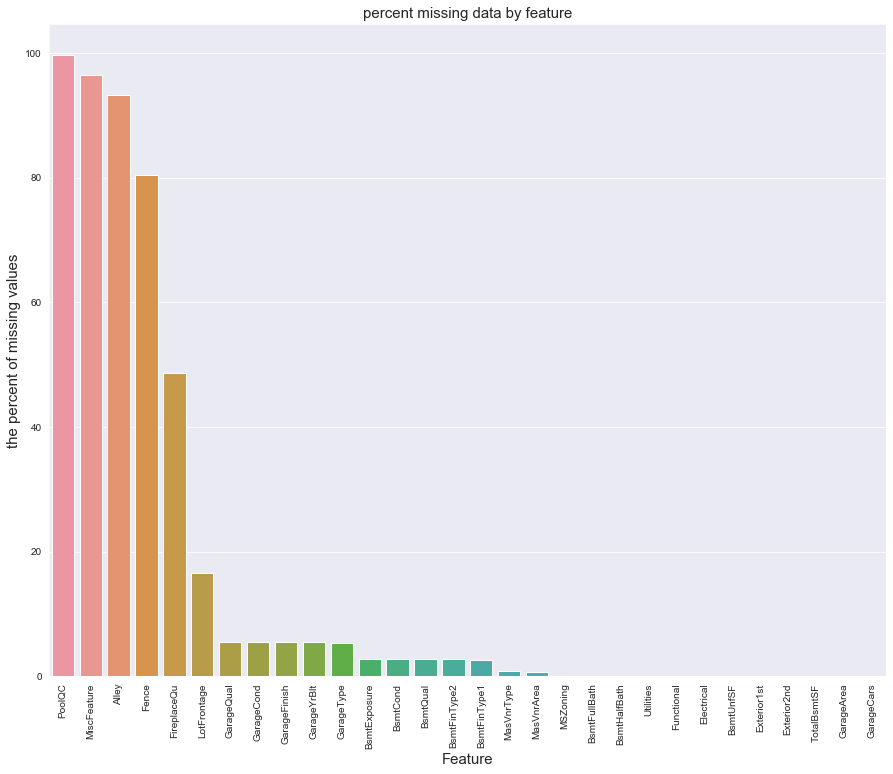

In [10]:
#缺失度进行可视化
plt.figure(figsize=(15,12)) #设置显示图片大小
plt.xticks(rotation='90') #坐标轴字体旋转
sns.barplot(x=missing_data.index,y='missing ratio',data=missing_data)
plt.xlabel('Feature',fontsize=15)
plt.ylabel('the percent of missing values',fontsize=15)
plt.title('percent missing data by feature',fontsize=15)

相关性探索

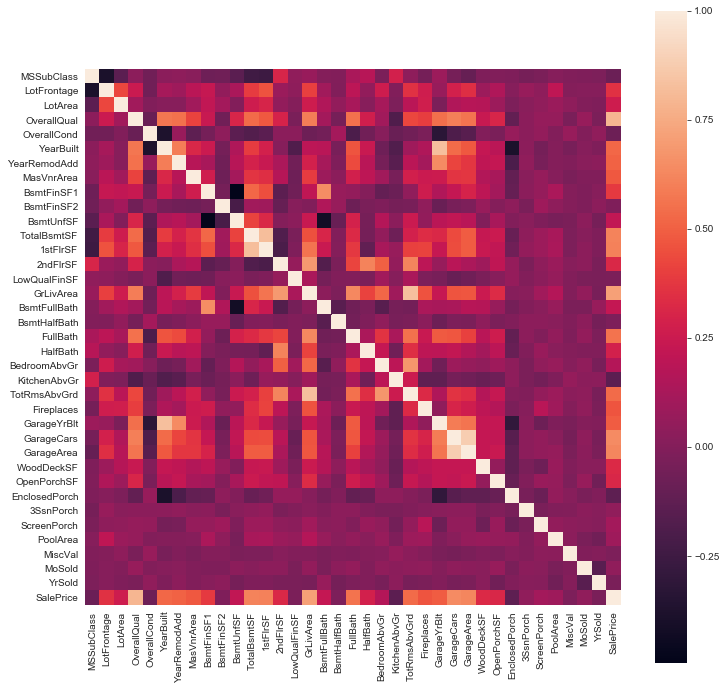

In [11]:
corrmap=train.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corrmap,square=True)

In [12]:
# 查看各个变量与房屋价格的相关性，从小到大排序
corrmap.sort_values(by='SalePrice',ascending=False)['SalePrice']

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

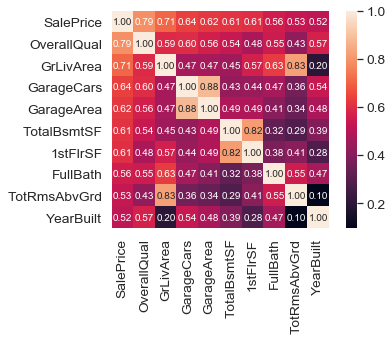

In [13]:
#选出10个与房价相关性最强的变量，查看相关系数并进行可视化
k=10
cols=corrmap.nlargest(k,'SalePrice')['SalePrice'].index   #index取出索也就是特征
cm=np.corrcoef(train[cols].values.T) # df.column.values 以array形式返回column的所有取值 #annot显示数字
# np中的corrcoef 要把同一标签的值放在一条记录里求相关系数，输入的要是array形式
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols, xticklabels=cols)
plt.show()

通过上面的热力图，我们可以有如下的结论：
'OverallQual', 'GrLivArea' ，'GarageCars'和 'TotalBsmtSF'，'1stFloor'与房价的相关性很强
其中'GarageCars'（车库能放多少量车） 和 'GarageArea' （车库面积）
   'TotalBsmtSF'(地下室面积总平方英尺) 和 '1stFloor'(一楼平方英尺)  
之间的相关性也很强，可能涉及到多重共线性的问题，一对是车库的形容，另一对都是对住房面积的形容，可以考虑每对中取出一个
下面可以用对相关性进行可视化，进一步观察。（还可以在相关性探索中发现离群点，异常值等）

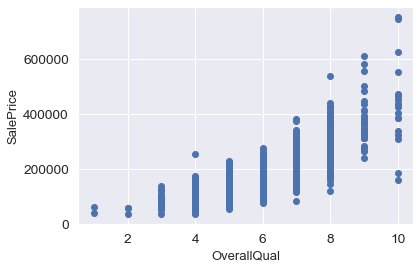

In [14]:
#OverallQual 装修材料和完成质量 ，发现数据为离散型的，后面改用箱线图进行可视化探索
fig,ax = plt.subplots()
#等价于：fig = plt.figure()         ax = fig.add_subplot(1,1,1)
ax.scatter(x=train['OverallQual'],y=train['SalePrice'])
plt.xlabel('OverallQual',fontsize=13)
plt.ylabel('SalePrice',fontsize=13)
plt.show()

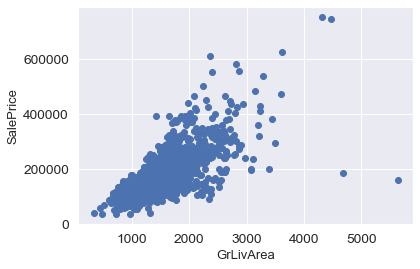

In [15]:
# GrLivArea居住面积平方英尺       右下角有两个离群点：面积很大但是价格很低，可以考虑删除
plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [16]:
# 'OverallQual', 'GrLivArea' ，'GarageCars'和 'TotalBsmtSF'，'1stFloor'与房价的相关性很强 其中'GarageCars'（车库能放多少量车） 和 'GarageArea' （车库面积） 'TotalBsmtSF'(地下室面积总平方英尺) 和 '1stFloor'(一楼平方英尺)

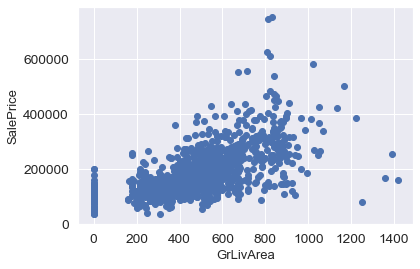

In [17]:
#GarageArea 车库面积
plt.scatter(x = train['GarageArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

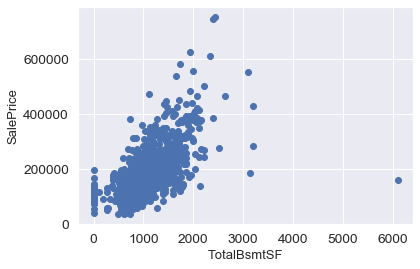

In [18]:
#TotalBsmtSF地下室面积总平方英尺，也有一个异常点
plt.scatter(x = train['TotalBsmtSF'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

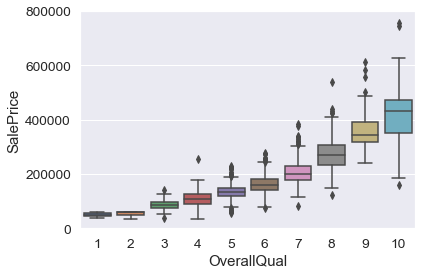

In [19]:
# OverallQual 房屋质量和房价的相关关系  ，总体来说随着房屋质量的提升，价格也在逐步提升
data=pd.concat([train.SalePrice,train.OverallQual],axis=1)
sns.boxplot(x='OverallQual',y='SalePrice',data=data)
plt.ylim(0,800000)
plt.show()

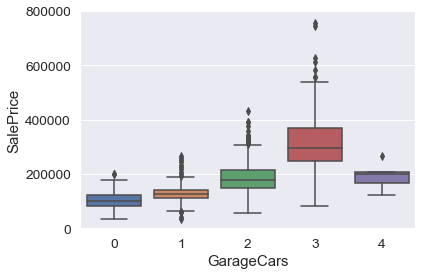

In [20]:
# GarageCars与房价的相关关系   总体来说随着车数的提升上升，但是在车数=4的时候出现了异常
data=pd.concat([train.GarageCars,train.SalePrice],axis=1)
sns.boxplot(x='GarageCars',y='SalePrice',data=data)
plt.ylim(0,800000)
plt.show()

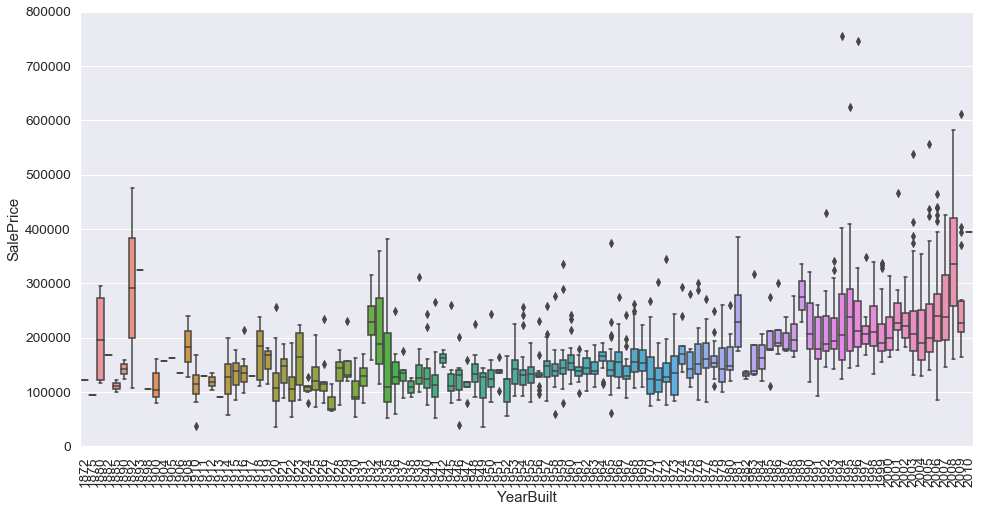

In [21]:
# YearBuilt 在相关性矩阵中虽然建造年份与房价的关系不是特别强，但是根据常识，应该越新的房子价格会高一些
plt.figure(figsize=(16,8))
data=pd.concat([train.YearBuilt,train.SalePrice],axis=1)
sns.boxplot(x='YearBuilt',y='SalePrice',data=data)
plt.ylim(0,800000)
plt.xticks(rotation=90)
plt.show()

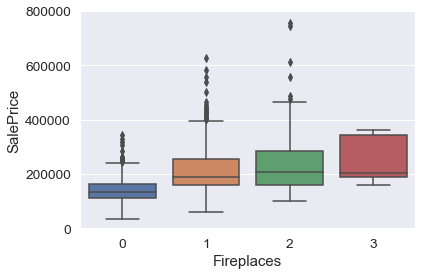

In [22]:
# GarageYrBlt 车库建立年份     MasVnrArea       Fireplaces壁炉数量 从图中可以看出有比较明显的正相关关系
sns.boxplot(x='Fireplaces',y='SalePrice',data=train)
plt.ylim(0,800000)
plt.show()

二、数据处理

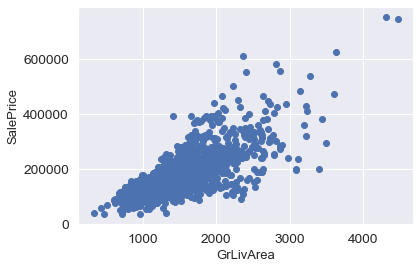

In [23]:
# 对前面可视化中散点图发现的离群点进行删除  居住面积
query=~((train.GrLivArea>4000)&(train.SalePrice<200000))
train=train.loc[query,:]

plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

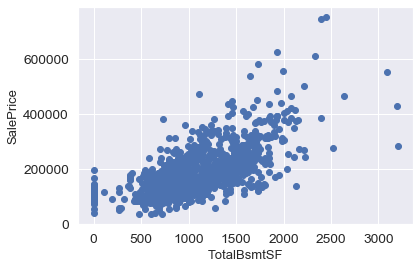

In [24]:
#TotalBsmtSF地下室面积总平方英尺     其实在处理了居住面积的离群点之后，地下室面积的一个离群点也消失了
query=~((train.TotalBsmtSF>5000)&(train.SalePrice<200000))
train=train.loc[query,:]

plt.scatter(x = train['TotalBsmtSF'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

后面可以通过验证分数查看异常值删除效果

In [25]:
all_data_na=all_data.isnull().sum()/len(all_data)*100
all_data_na=pd.DataFrame(all_data_na).reset_index()
all_data_na.rename(columns={'index':'feature',0:'Missing Ratio'}).sort_values(by='Missing Ratio',ascending=False)[:30].reset_index(drop=True)

,feature,Missing Ratio
0,PoolQC,99.657417
1,MiscFeature,96.402878
2,Alley,93.216855
3,Fence,80.438506
4,FireplaceQu,48.646797
5,LotFrontage,16.649538
6,GarageYrBlt,5.447071
7,GarageQual,5.447071
8,GarageFinish,5.447071
9,GarageCond,5.447071


In [26]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [27]:
#PoolQC、MiscFeature、Alley的缺失值都在90%以上，选择直接删除掉这些特征
all_data=all_data.drop(['PoolQC','MiscFeature','Alley'],axis=1)
all_data.shape

(2919, 76)

In [28]:
#Fence栅栏，FireplaceQu壁炉，如果数据缺失的话可能是代表房屋没有栅栏或壁炉， 用特殊值None填，代表房屋没有栅栏或壁炉
all_data['Fence']=all_data['Fence'].fillna('None')
all_data['FireplaceQu']=all_data['FireplaceQu'].fillna('None')

In [29]:
#LotFrontage代表房屋前街道的长度，从现实中考虑，房屋前街道的长度可能是会和房屋所在一个街区的房屋相同，所以我们可以考虑同一个街区房屋
#LotFrontage的均值来填补缺失值  也可以用replace 
#all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
#    lambda x: x.fillna(x.mean()))

In [30]:
#all_data["LotFrontage"].describe()

In [31]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.replace(np.nan,x.mean()))

In [32]:
# all_data['LotFrontage']=all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [33]:
# Garage相关的车库变量，注意到这些变量的缺失比例是基本完全相同的，说明这些变量的缺失原因可能一样，比如房屋可能是没有车库，对类别型
# 采取None填充，数值型采取0填充
all_data[['GarageType','GarageFinish','GarageQual','GarageCond']]=all_data[['GarageType','GarageFinish','GarageQual','GarageCond']].replace(np.nan,'None')
all_data[['GarageYrBlt','GarageArea','GarageCars']]=all_data[['GarageYrBlt','GarageArea','GarageCars']].replace(np.nan,0)

In [34]:
# 同理地下室的别型采取None填充，数值型采取0填充
all_data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']]=all_data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].replace(np.nan,'None')
all_data[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']]=all_data[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']].replace(np.nan,0)

In [35]:
# 砖石结构的相关变量同样采取 None和0填充
all_data['MasVnrType'].replace(np.nan,'None',inplace=True)
all_data['MasVnrArea'].replace(np.nan,0,inplace=True)

In [36]:
all_data['MasVnrArea'].isnull().any()

False

In [37]:
# MSZoning代表房屋所处的用地类型，不可能有房屋没有用地类型，可以考虑用众数填充
all_data['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [38]:
all_data['MSZoning'].replace(np.nan,all_data['MSZoning'].mode()[0],inplace=True)

In [39]:
#  其他类别型的变量同理，采取众数填充或者None填充

all_data['Functional'].replace(np.nan,all_data['Functional'].mode()[0],inplace=True)
all_data['Electrical'].replace(np.nan,all_data['Electrical'].mode()[0],inplace=True)
all_data['KitchenQual'].replace(np.nan,all_data['KitchenQual'].mode()[0],inplace=True)
all_data['Exterior1st'].replace(np.nan,all_data['Exterior1st'].mode()[0],inplace=True)
all_data['Exterior2nd'].replace(np.nan,all_data['Exterior2nd'].mode()[0],inplace=True)
all_data['SaleType'].replace(np.nan,all_data['SaleType'].mode()[0],inplace=True)
all_data['MSSubClass'].replace(np.nan,'None',inplace=True)

In [40]:
all_data.Utilities.value_counts()   #发现这个特征的区分度不够，直接删除

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [41]:
all_data = all_data.drop(['Utilities'], axis=1)

In [42]:
# 再倒回运行missing ration 那块的代码，可以发现缺失值已经处理好了

回归分析中因变量需要符合正态性分布，所以这里对房价的分布进行检测，从房价的直方图分布和qq-plot可以看出：
房价的分布是右偏的，需要对其做一些处理，使其符合正态分布
响应变量服从正态分布,误差项满足高斯--马尔科夫条件（零均值、等方差、不相关）只是理想化的假定

mu为180932.92,sigma为79467.79


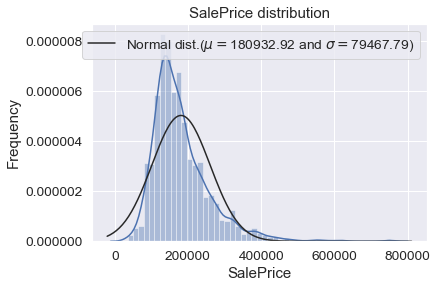

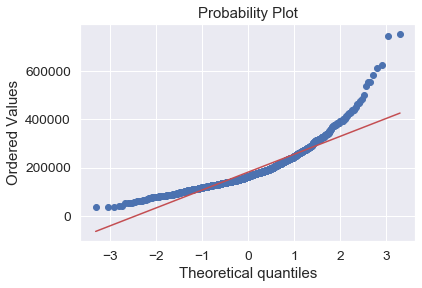

In [43]:
sns.distplot(train.SalePrice,fit=norm)   #fit=norm表示显示标准正态分布的线
(mu,sigma)=norm.fit(train.SalePrice)    #norm_hist：默认为True, 直方图高度显示密度而非计数
print('mu为{:.2f},sigma为{:.2f}'.format(mu,sigma))
plt.legend(['Normal dist.($\mu=${:.2f} and $\sigma=${:.2f})'.format(mu,sigma)])
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig=plt.figure()
stats.probplot(train.SalePrice,plot=plt)
plt.show()


采用log对数变换对房价进行处理，通过下面转换后房价的分布可以看出，房价转换后符合正态分布。 log1p=ln(x+1) exmp1逆运算

mu为12.02,sigma为0.40


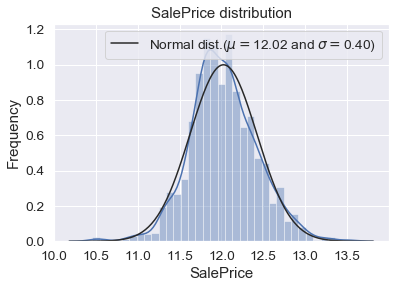

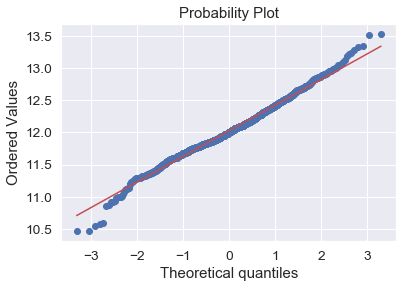

In [44]:
train['SalePrice']=np.log1p(train['SalePrice'])
sns.distplot(train.SalePrice,fit=norm)   
(mu,sigma)=norm.fit(train.SalePrice)   
print('mu为{:.2f},sigma为{:.2f}'.format(mu,sigma))
plt.legend(['Normal dist.($\mu=${:.2f} and $\sigma=${:.2f})'.format(mu,sigma)])
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig=plt.figure()
stats.probplot(train.SalePrice,plot=plt)
plt.show()

三、特征工程
特征工程（Feature engineering）是将原始数据转换为能够更好地将潜在问题表示为预测模型的特征，进而提高对未知数据模型精度的过程。
可分为三大部分：特征预处理、特征抽取、特征筛选

In [45]:
# 尝试构造新特征
# 将地下室面积、1楼面积和2楼面积加起来得到房屋总面积的特征
all_data['TotalSF']=all_data['TotalBsmtSF']+all_data['1stFlrSF']+all_data['2ndFlrSF']
# 建造时间离现在较近的房屋价格较高，因此可以以1990位界限，构造01特征
all_data['YearBuilt_cut']=all_data['YearBuilt'].apply(lambda x:1 if x>1990 else 0)

In [46]:
tep=all_data[:ntrain]
tep['SalePrice']=y_train

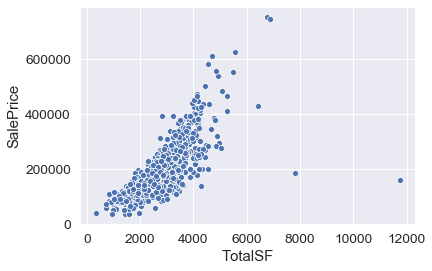

In [47]:
# 利用可视化观察新特征与目标变量的分布情况  有两个异常值可以考虑删除
sns.scatterplot(x='TotalSF',y='SalePrice',data=tep)
plt.show()

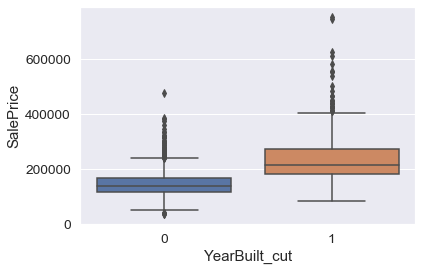

In [48]:
# 可以看出在1990年之前和之后建造的房子在售价上差别也比较大
sns.boxplot(x='YearBuilt_cut',y='SalePrice',data=tep)
plt.show()

特征处理环节

In [49]:
# 对离散的特征变量进行编码 对有序离散变量采取LableEncoder
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for c in cols:
    lbl=LabelEncoder()
    all_data[c]=lbl.fit_transform(list(all_data[c].values))
all_data.head(5)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF,YearBuilt_cut
0,856,854,0,3,1Fam,4,3,706.0,0.0,2,6,1.0,0.0,2,150.0,1,Norm,Norm,SBrkr,0,4,2,VinylSd,VinylSd,None,3,0,PConc,2,6,548.0,2.0,5,2,5,Attchd,2003.0,1710,1,GasA,0,2Story,1,2,Lvl,0,8450,Inside,65.0,3,0,5,RL,196.0,BrkFace,0,1,CollgCr,61,4,7,2,0,CompShg,Gable,Normal,WD,0,1,8,856.0,0,2003,2003,2,2566.0,1
1,1262,0,0,3,1Fam,4,1,978.0,0.0,0,6,0.0,1.0,2,284.0,1,Feedr,Norm,SBrkr,0,4,3,MetalSd,MetalSd,None,5,1,CBlock,2,6,460.0,2.0,5,2,5,Attchd,1976.0,1262,0,GasA,0,1Story,1,3,Lvl,0,9600,FR2,80.0,3,0,0,RL,0.0,None,0,4,Veenker,0,7,6,2,0,CompShg,Gable,Normal,WD,0,1,6,1262.0,298,1976,1976,1,2524.0,0
2,920,866,0,3,1Fam,4,2,486.0,0.0,2,6,1.0,0.0,2,434.0,1,Norm,Norm,SBrkr,0,4,2,VinylSd,VinylSd,None,5,1,PConc,2,6,608.0,2.0,5,2,5,Attchd,2001.0,1786,1,GasA,0,2Story,1,2,Lvl,0,11250,Inside,68.0,0,0,5,RL,162.0,BrkFace,0,8,CollgCr,42,4,7,2,0,CompShg,Gable,Normal,WD,0,1,6,920.0,0,2001,2002,2,2706.0,1
3,961,756,0,3,1Fam,1,3,216.0,0.0,0,6,1.0,0.0,4,540.0,1,Norm,Norm,SBrkr,272,4,3,Wd Sdng,Wd Shng,None,2,1,BrkTil,1,6,642.0,3.0,5,3,5,Detchd,1998.0,1717,0,GasA,2,2Story,1,2,Lvl,0,9550,Corner,60.0,0,0,6,RL,0.0,None,0,1,Crawfor,35,4,7,2,0,CompShg,Gable,Abnorml,WD,0,1,7,756.0,0,1915,1970,0,2473.0,0
4,1145,1053,0,4,1Fam,4,0,655.0,0.0,2,6,1.0,0.0,2,490.0,1,Norm,Norm,SBrkr,0,4,2,VinylSd,VinylSd,None,5,1,PConc,2,6,836.0,3.0,5,2,5,Attchd,2000.0,2198,1,GasA,0,2Story,1,2,Lvl,0,14260,FR2,84.0,0,0,5,RL,350.0,BrkFace,0,11,NoRidge,84,4,8,2,0,CompShg,Gable,Normal,WD,0,1,9,1145.0,192,2000,2000,2,3343.0,1


In [50]:
# 剩余的非有序离散变量转为哑变量
all_data=pd.get_dummies(all_data)

避免多重共线性问题，下面我们会识别皮尔森相关性系数大于0.9的特征，并将这些特征删除

In [51]:
threshold = 0.9
corr_matrix = all_data.corr().abs()
corr_matrix.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,EnclosedPorch,ExterCond,ExterQual,FireplaceQu,Fireplaces,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,KitchenAbvGr,KitchenQual,LandSlope,LotArea,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF,YearBuilt_cut,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
1stFlrSF,1.000000,0.249823,0.044086,0.108418,0.040297,0.247172,0.458206,0.084389,0.123944,0.024482,0.257950,0.010462,0.329298,0.296788,0.154872,0.065796,0.072177,0.396401,0.110535,0.407545,0.373077,0.076788,0.491996,0.440552,0.158349,0.252799,0.162694,0.148152,0.562538,0.104141,0.172730,0.076071,0.375609,0.071674,0.332460,0.435674,0.196798,0.012704,0.239128,0.392367,0.093062,0.040143,0.238502,0.157418,0.479152,0.188612,0.121900,0.098381,0.033956,0.391782,0.801376,0.227347,0.310814,0.242245,0.013442,0.793379,0.237462,0.051597,0.048036,0.091270,0.1

In [52]:
# np.triu返回上三角矩阵，k=1是右移一个单位，这样可以少掉对角线
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
upper.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,EnclosedPorch,ExterCond,ExterQual,FireplaceQu,Fireplaces,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,KitchenAbvGr,KitchenQual,LandSlope,LotArea,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF,YearBuilt_cut,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
1stFlrSF,NaN,0.249823,0.044086,0.108418,0.040297,0.247172,0.458206,0.084389,0.123944,0.024482,0.257950,0.010462,0.329298,0.296788,0.154872,0.065796,0.072177,0.396401,0.110535,0.407545,0.373077,0.076788,0.491996,0.440552,0.158349,0.252799,0.162694,0.148152,0.562538,0.104141,0.172730,0.076071,0.375609,0.071674,0.332460,0.435674,0.196798,0.012704,0.239128,0.392367,0.093062,0.040143,0.238502,0.157418,0.479152,0.188612,0.121900,0.098381,0.033956,0.391782,0.801376,0.227347,0.310814,0.242245,0.013442,0.793379,0.237462,0.051597,0.048036,0.091270,0.193088

In [53]:
# 删除特征值
to_drop=[column for column in upper.columns if any(upper[column]>threshold)]
all_data.drop(to_drop,axis=1,inplace=True)
all_data.shape

(2919, 213)

In [54]:
# 分开 train 数据和 test 数据
train=all_data[:ntrain]
test=all_data[ntrain:]

四、建模
正则化线性回归模型，L1正则 lasso 和L2正则 Ridge

In [55]:
# 导入包
from sklearn.linear_model import Ridge,RidgeCV,ElasticNet,LassoCV,LassoLarsCV
from sklearn.model_selection import cross_val_score

In [56]:
def rmse_cv(model):
    rmse=np.sqrt(-cross_val_score(model,train,y_train,scoring='neg_mean_squared_error',cv=5))
    return(rmse)

In [57]:
model_ridge=Ridge()

In [58]:
# 调节模型中的参数阿尔法
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge=[rmse_cv(Ridge(alpha=alpha)).mean() for alpha in alphas]

In [59]:
cv_ridge=pd.DataFrame(cv_ridge,index=alphas).reset_index()
cv_ridge=cv_ridge.rename(columns={0:'score'})
cv_ridge

,index,score
0,0.05,33913.518332
1,0.10,33552.283764
2,0.30,32750.871979
3,1.00,32065.216428
4,3.00,31854.903271
5,5.00,31823.217179
6,10.00,31824.772393
7,15.00,31858.364835
8,30.00,31993.148653
9,50.00,32161.751482


Text(0, 0.5, 'rmse')

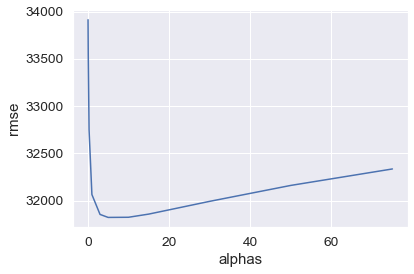

In [60]:
sns.lineplot(x='index',y='score',data=cv_ridge)
plt.xlabel('alphas')
plt.ylabel('rmse')

In [61]:
# 在alpha为5作为模型参数
clf = Ridge(alpha=5)
clf.fit(train,y_train)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [62]:
sub=pd.DataFrame()
sub['id']=test_ID
sub['saleprice']=clf.predict(test)
sub.head()
sub.to_csv('submission.csv',index=False)